# House Price Prediction

# Features

**SalePrice**: - the property's sale price in dollars. This is the target variable that you're trying to predict.

**MSSubClass**: The building class

**MSZoning:** The general zoning classification

**LotFrontage:** Linear feet of street connected to property

**LotArea:** Lot size in square feet

**Street:** Type of road access

**Alley:** Type of alley access

**LotShape:** General shape of property

**LandContour:** Flatness of the property

**Utilities:** Type of utilities available

**LotConfig:** Lot configuration

**LandSlope:** Slope of property

**Neighborhood:** Physical locations within Ames city limits

**Condition1:** Proximity to main road or railroad

**Condition2:** Proximity to main road or railroad (if a second is present)

**BldgType:** Type of dwelling

**HouseStyle:** Style of dwelling

**OverallQual:** Overall material and finish quality

**OverallCond:** Overall condition rating

**YearBuilt**: Original construction date

**YearRemodAdd:** Remodel date

**RoofStyle:** Type of roof

**RoofMatl:** Roof material

**Exterior1st:** Exterior covering on house

**Exterior2nd**: Exterior covering on house (if more than one material)

**MasVnrType:** Masonry veneer type

**MasVnrArea:** Masonry veneer area in square feet

**ExterQual:** Exterior material quality

**ExterCond:** Present condition of the material on the exterior

**Foundation:** Type of foundation

**BsmtQual:** Height of the basement

**BsmtCond:** General condition of the basement

**BsmtExposure:** Walkout or garden level basement walls

**BsmtFinType1:** Quality of basement finished area

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinType2:** Quality of second finished area (if present)

**BsmtFinSF2:** Type 2 finished square feet

**BsmtUnfSF:** Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**Heating:** Type of heating

**HeatingQC:** Heating quality and condition

**CentralAir:** Central air conditioning

**Electrical:** Electrical system

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**BsmtFullBath:** Basement full bathrooms

**BsmtHalfBath:** Basement half bathrooms

**FullBath:** Full bathrooms above grade

**HalfBath:** Half baths above grade

**Bedroom:** Number of bedrooms above basement level

**Kitchen**: Number of kitchens

**KitchenQual:** Kitchen quality

**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)

**Functional:**Home functionality rating

**Fireplaces:** Number of fireplaces

**FireplaceQu**: Fireplace quality

**GarageType**: Garage location

**GarageYrBlt:** Year garage was built

**GarageFinish:** Interior finish of the garage

**GarageCars**: Size of garage in car capacity

**GarageArea:** Size of garage in square feet

**GarageQual:** Garage quality

**GarageCond:** Garage condition

**PavedDrive**: Paved driveway

**WoodDeckSF:** Wood deck area in square feet

**OpenPorchSF:** Open porch area in square feet

**EnclosedPorch:** Enclosed porch area in square feet

**3SsnPorch:** Three season porch area in square feet

**ScreenPorch:** Screen porch area in square feet

**PoolArea:** Pool area in square feet

**PoolQC:** Pool quality

**Fence:** Fence quality

**MiscFeature:** Miscellaneous feature not covered in other categories

**MiscVal:** $Value of miscellaneous feature

**MoSold:** Month Sold

**YrSold:** Year Sold

**SaleType:** Type of sale

**SaleCondition**: Condition of sale

# Imports

In [ ]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.3.3 Tensorflow Current Version: 2.16.1


In [ ]:
# !pip uninstall tf-keras
# !pip install keras-tuner
# !pip install tensorflow==2.16.1

Found existing installation: tf_keras 2.15.1
Uninstalling tf_keras-2.15.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tf_keras-2.15.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tf_keras/*
Proceed (Y/n)? y
  Successfully uninstalled tf_keras-2.15.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from joblib import dump, load

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow import keras


from keras import metrics
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, ReLU, LeakyReLU, PReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.activations import linear

from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

random.seed(46)
np.random.seed(46)
tf.random.set_seed(46)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Functions

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car

def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):

    #Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()

def get_best_epoch_details(history, metric="val_loss", mode=min):
    metric_values = history.history[metric]
    min_metric_value_index = metric_values.index(mode(metric_values))
    best_epoch = min_metric_value_index + 1

    metrics = []
    values = []

    for key, value in history.history.items():
        metrics.append(key)
        values.append(value[min_metric_value_index])

    data = {'Metric': metrics, 'Value': values}
    df = pd.DataFrame(data)
    df['Value'] = df['Value'].map('{:.4f}'.format)
    best_epoch_data = pd.DataFrame({'Metric': ['best_epoch'], 'Value': [str(best_epoch)]})
    df = pd.concat([df, best_epoch_data], ignore_index=True)
    return df

def print_hyperparameters(hyperparameters):
    hp_df = pd.DataFrame(list(hyperparameters.items()), columns=['Hyperparameter', 'Value'])
    print(hp_df)

In [ ]:
def data_proprocessing(dataframe):

    no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

    for col in no_cols:
        dataframe[col].fillna("No",inplace=True)

    dataframe["NEW_1st*GrLiv"] = dataframe["1stFlrSF"] * dataframe["GrLivArea"]
    dataframe["NEW_Garage*GrLiv"] = (dataframe["GarageArea"] * dataframe["GrLivArea"])
    dataframe["NEW_TotalFlrSF"] = dataframe["1stFlrSF"] + dataframe["2ndFlrSF"]
    dataframe["NEW_TotalBsmtFin"] = dataframe.BsmtFinSF1 + dataframe.BsmtFinSF2
    dataframe["NEW_PorchArea"] = dataframe.OpenPorchSF + dataframe.EnclosedPorch + dataframe.ScreenPorch + dataframe["3SsnPorch"] + dataframe.WoodDeckSF
    dataframe["NEW_TotalHouseArea"] = dataframe.NEW_TotalFlrSF + dataframe.TotalBsmtSF
    dataframe["NEW_TotalSqFeet"] = dataframe.GrLivArea + dataframe.TotalBsmtSF
    dataframe["NEW_LotRatio"] = dataframe.GrLivArea / dataframe.LotArea
    dataframe["NEW_RatioArea"] = dataframe.NEW_TotalHouseArea / dataframe.LotArea
    dataframe["NEW_GarageLotRatio"] = dataframe.GarageArea / dataframe.LotArea
    dataframe["NEW_MasVnrRatio"] = dataframe.MasVnrArea / dataframe.NEW_TotalHouseArea
    dataframe["NEW_DifArea"] = (dataframe.LotArea - dataframe["1stFlrSF"] - dataframe.GarageArea - dataframe.NEW_PorchArea - dataframe.WoodDeckSF)
    dataframe["NEW_OverallGrade"] = dataframe["OverallQual"] * dataframe["OverallCond"]
    dataframe["NEW_Restoration"] = dataframe.YearRemodAdd - dataframe.YearBuilt
    dataframe["NEW_HouseAge"] = dataframe.YrSold - dataframe.YearBuilt
    dataframe["NEW_RestorationAge"] = dataframe.YrSold - dataframe.YearRemodAdd
    dataframe["NEW_GarageAge"] = dataframe.GarageYrBlt - dataframe.YearBuilt
    dataframe["NEW_GarageRestorationAge"] = np.abs(dataframe.GarageYrBlt - dataframe.YearRemodAdd)
    dataframe["NEW_GarageSold"] = dataframe.YrSold - dataframe.GarageYrBlt

    drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood", "Id"]

    dataframe.drop(drop_list, axis=1, inplace=True)

    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    num_cols.remove("SalePrice")

    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=True, dtype=int)

    feature_scaler = MinMaxScaler()

    target_scaler = MinMaxScaler()

    dataframe[num_cols] = feature_scaler.fit_transform(dataframe[num_cols])

    dataframe["SalePrice"] = target_scaler.fit_transform(dataframe[["SalePrice"]])


    dump(feature_scaler, 'feature_scaler.joblib')
    dump(target_scaler, 'target_scaler.joblib')

    dataframe.fillna(dataframe.mean(), inplace=True)

    dataframe.columns = [col.replace(' ', '_').upper() for col in dataframe.columns]

    y = dataframe["SALEPRICE"]
    X = dataframe.drop(["SALEPRICE"], axis=1)

    return X, y

# Data Preparation

In [ ]:
df = pd.read_csv("/content/house_prices.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
X, y = data_proprocessing(df)

In [ ]:
X.head()

,MSSUBCLASS,LOTFRONTAGE,LOTAREA,OVERALLQUAL,YEARBUILT,YEARREMODADD,MASVNRAREA,BSMTFINSF1,BSMTFINSF2,BSMTUNFSF,TOTALBSMTSF,1STFLRSF,2NDFLRSF,LOWQUALFINSF,GRLIVAREA,TOTRMSABVGRD,GARAGEYRBLT,GARAGEAREA,WOODDECKSF,OPENPORCHSF,ENCLOSEDPORCH,3SSNPORCH,SCREENPORCH,MISCVAL,MOSOLD,NEW_1ST*GRLIV,NEW_GARAGE*GRLIV,NEW_TOTALFLRSF,NEW_TOTALBSMTFIN,NEW_PORCHAREA,NEW_TOTALHOUSEAREA,NEW_TOTALSQFEET,NEW_LOTRATIO,NEW_RATIOAREA,NEW_GARAGELOTRATIO,NEW_MASVNRRATIO,NEW_DIFAREA,NEW_OVERALLGRADE,NEW_RESTORATION,NEW_HOUSEAGE,NEW_RESTORATIONAGE,NEW_GARAGEAGE,NEW_GARAGERESTORATIONAGE,NEW_GARAGESOLD,MSZONING_FV,MSZONING_RH,MSZONING_RL,MSZONING_RM,LOTSHAPE_IR2,LOTSHAPE_IR3,LOTSHAPE_REG,LOTCONFIG_CULDSAC,LOTCONFIG_FR2,LOTCONFIG_FR3,LOTCONFIG_INSIDE,CONDITION1_FEEDR,CONDITION1_NORM,CONDITION1_POSA,CONDITION1_POSN,CONDITION1_RRAE,CONDITION1_RRAN,CONDITION1_RRNE,CONDITION1_RRNN,CONDITION2_FEEDR,CONDITION2_NORM,CONDITION2_POSA,CONDITION2_POSN,CONDITION2_RRAE,CONDITION2_RRAN,CONDITION2_RRNN,BLDGTYPE_2FMCON,BLDGTYPE_DUPLEX,BLDGTYPE_TWNHS,BLDGTYPE_TWNHSE,HOUSESTYLE_1.5UNF,HOUSESTYLE_1STORY,HOUSESTYLE_2.5FIN,HOUSESTYLE_2.5UNF,HOUSESTYLE_2STORY,HOUSESTYLE_SFOYER,HOUSESTYLE_SLVL,ROOFSTYLE_GABLE,ROOFSTYLE_GAMBREL,ROOFSTYLE_HIP,ROOFSTYLE_MANSARD,ROOFSTYLE_SHED,ROOFMATL_COMPSHG,ROOFMATL_MEMBRAN,ROOFMATL_METAL,ROOFMATL_ROLL,ROOFMATL_TAR&GRV,ROOFMATL_WDSHAKE,ROOFMATL_WDSHNGL,EXTERIOR1ST_ASPHSHN,EXTERIOR1ST_BRKCOMM,EXTERIOR1ST_BRKFACE,EXTERIOR1ST_CBLOCK,EXTERIOR1ST_CEMNTBD,EXTERIOR1ST_HDBOARD,EXTERIOR1ST_IMSTUCC,EXTERIOR1ST_METALSD,EXTERIOR1ST_PLYWOOD,EXTERIOR1ST_STONE,EXTERIOR1ST_STUCCO,EXTERIOR1ST_VINYLSD,EXTERIOR1ST_WD_SDNG,EXTERIOR1ST_WDSHING,EXTERIOR2ND_ASPHSHN,EXTERIOR2ND_BRK_CMN,EXTERIOR2ND_BRKFACE,EXTERIOR2ND_CBLOCK,EXTERIOR2ND_CMENTBD,EXTERIOR2ND_HDBOARD,EXTERIOR2ND_IMSTUCC,EXTERIOR2ND_METALSD,EXTERIOR2ND_OTHER,EXTERIOR2ND_PLYWOOD,EXTERIOR2ND_STONE,EXTERIOR2ND_STUCCO,EXTERIOR2ND_VINYLSD,EXTERIOR2ND_WD_SDNG,EXTERIOR2ND_WD_SHNG,MASVNRTYPE_BRKFACE,MASVNRTYPE_STONE,EXTERQUAL_FA,EXTERQUAL_GD,EXTERQUAL_TA,EXTERCOND_FA,EXTERCOND_GD,EXTERCOND_PO,EXTERCOND_TA,FOUNDATION_CBLOCK,FOUNDATION_PCONC,FOUNDATION_SLAB,FOUNDATION_STONE,FOUNDATION_WOOD,BSMTQUAL_FA,BSMTQUAL_GD,BSMTQUAL_NO,BSMTQUAL_TA,BSMTCOND_GD,BSMTCOND_NO,BSMTCOND_PO,BSMTCOND_TA,BSMTEXPOSURE_GD,BSMTEXPOSURE_MN,BSMTEXPOSURE_NO,BSMTFINTYPE1_BLQ,BSMTFINTYPE1_GLQ,BSMTFINTYPE1_LWQ,BSMTFINTYPE1_NO,BSMTFINTYPE1_REC,BSMTFINTYPE1_UNF,BSMTFINTYPE2_BLQ,BSMTFINTYPE2_GLQ,BSMTFINTYPE2_LWQ,BSMTFINTYPE2_NO,BSMTFINTYPE2_REC,BSMTFINTYPE2_UNF,HEATINGQC_FA,HEATINGQC_GD,HEATINGQC_PO,HEATINGQC_TA,CENTRALAIR_Y,ELECTRICAL_FUSEF,ELECTRICAL_FUSEP,ELECTRICAL_MIX,ELECTRICAL_SBRKR,KITCHENQUAL_FA,KITCHENQUAL_GD,KITCHENQUAL_TA,FUNCTIONAL_MAJ2,FUNCTIONAL_MIN1,FUNCTIONAL_MIN2,FUNCTIONAL_MOD,FUNCTIONAL_SEV,FUNCTIONAL_TYP,FIREPLACEQU_FA,FIREPLACEQU_GD,FIREPLACEQU_NO,FIREPLACEQU_PO,FIREPLACEQU_TA,GARAGETYPE_ATTCHD,GARAGETYPE_BASMENT,GARAGETYPE_BUILTIN,GARAGETYPE_CARPORT,GARAGETYPE_DETCHD,GARAGETYPE_NO,GARAGEFINISH_NO,GARAGEFINISH_RFN,GARAGEFINISH_UNF,GARAGEQUAL_FA,GARAGEQUAL_GD,GARAGEQUAL_NO,GARAGEQUAL_PO,GARAGEQUAL_TA,GARAGECOND_FA,GARAGECOND_GD,GARAGECOND_NO,GARAGECOND_PO,GARAGECOND_TA,PAVEDDRIVE_P,PAVEDDRIVE_Y,FENCE_GDWO,FENCE_MNPRV,FENCE_MNWW,FENCE_NO,SALETYPE_CWD,SALETYPE_CON,SALETYPE_CONLD,SALETYPE_CONLI,SALETYPE_CONLW,SALETYPE_NEW,SALETYPE_OTH,SALETYPE_WD,SALECONDITION_ADJLAND,SALECONDITION_ALLOCA,SALECONDITION_FAMILY,SALECONDITION_NORMAL,SALECONDITION_PARTIAL,OVERALLCOND_2,OVERALLCOND_3,OVERALLCOND_4,OVERALLCOND_5,OVERALLCOND_6,OVERALLCOND_7,OVERALLCOND_8,OVERALLCOND_9,BSMTFULLBATH_1,BSMTFULLBATH_2,BSMTFULLBATH_3,BSMTHALFBATH_1,BSMTHALFBATH_2,FULLBATH_1,FULLBATH_2,FULLBATH_3,HALFBATH_1,HALFBATH_2,BEDROOMABVGR_1,BEDROOMABVGR_2,BEDROOMABVGR_3,BEDROOMABVGR_4,BEDROOMABVGR_5,BEDROOMABVGR_6,BEDROOMABVGR_8,KITCHENABVGR_1,KITCHENABVGR_2,KITCHENABVGR_3,FIREPLACES_1,FIREPLACES_2,FIREPLACES_3,GARAGECARS_1,GARAGECARS_2,GARAGECARS_3,GARAGECARS_4,POOLAREA_480,POOLAREA_512,POOLAREA_519,POOLAREA_555,POOLAREA_576,POOLAREA_648,POOLAREA_738,YRSOLD_2007,YRSOLD_20

In [ ]:
X.shape

(1460, 266)

In [ ]:
y.head()

0   0.24108
1   0.20358
2   0.26191
3   0.14595
4   0.29871
Name: SALEPRICE, dtype: float64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

# Model

In [ ]:
base_model = Sequential([
    Input(shape=(train_ds.element_spec[0].shape[1],)),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),

    BatchNormalization(),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),

    BatchNormalization(),

    Dense(1, activation='linear')])

In [ ]:
optimizer = Adam(learning_rate=0.001)

base_model.compile(

    optimizer=optimizer,

    loss='mse',

    metrics=[MeanSquaredError(), RootMeanSquaredError(), MeanAbsoluteError()]
)

In [ ]:
early_stopping = EarlyStopping(

    monitor='val_mean_squared_error',

    patience=100,

    verbose=1,

    restore_best_weights=True,

    mode="min"
)

In [ ]:
base_model_history = base_model.fit(train_ds,

                                    epochs=1000,

                                    validation_data=val_ds,

                                    verbose=1,

                                    callbacks=early_stopping)

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 1.6999 - mean_absolute_error: 0.9973 - mean_squared_error: 1.6495 - root_mean_squared_error: 1.2755 - val_loss: 0.0838 - val_mean_absolute_error: 0.1529 - val_mean_squared_error: 0.0357 - val_root_mean_squared_error: 0.1889
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4027 - mean_absolute_error: 0.4458 - mean_squared_error: 0.3549 - root_mean_squared_error: 0.5949 - val_loss: 0.0864 - val_mean_absolute_error: 0.1637 - val_mean_squared_error: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2561 - mean_absolute_error: 0.3500 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4569 - val_loss: 0.0907 - val_mean_absolute_error: 0.1733 - val_mean_squared_error: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1958 - mean_absolute_error: 0.2911 - mean_squared_error: 0.1494 - root_mean_squared_e

In [ ]:
get_best_epoch_details(base_model_history, metric="val_mean_squared_error", mode=min)

,Metric,Value
0,loss,0.0026
1,mean_absolute_error,0.0279
2,mean_squared_error,0.0013
3,root_mean_squared_error,0.0367
4,val_loss,0.0026
5,val_mean_absolute_error,0.0265
6,val_mean_squared_error,0.0014
7,val_root_mean_squared_error,0.0380
8,best_epoch,208


In [ ]:
val_loss, val_mse, val_rmse, val_mae = base_model.evaluate(val_ds, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")

Validation Loss: 0.0026316598523408175
Validation MSE: 0.001441761152818799
Validation RMSE: 0.03797052800655365
Validation MAE: 0.026546526700258255


In [ ]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │           4,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,933 (58.34 KB)

 Trainable params: 4,945 (19.32 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 9,892 (38.64 KB)

# Inverse Predictions

In [ ]:
feature_scaler = load('/content/feature_scaler.joblib')

target_scaler = load('/content/target_scaler.joblib')

In [ ]:
def evaluate_inverse(val_ds, model, scaler):
    predictions = []
    true_values = []

    for features, labels in val_ds:

        batch_predictions = model.predict(features, verbose=0)

        predictions.extend(batch_predictions.flatten())

        true_values.extend(labels.numpy().flatten())

    predictions = np.array(predictions)

    true_values = np.array(true_values)

    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    true_values = scaler.inverse_transform(true_values.reshape(-1, 1))

    mse = mean_squared_error(true_values, predictions)

    rmse = np.sqrt(mse)

    mae = mean_absolute_error(true_values, predictions)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")

    print("y_true_mean:", true_values.mean())
    print("y_true_std:", true_values.std())


In [ ]:
evaluate_inverse(val_ds, base_model, target_scaler)

Mean Squared Error: 747616570.5134469
Root Mean Squared Error: 27342.577978556576
Mean Absolute Error: 19116.154417273116
y_true_mean: 178839.81164383562
y_true_std: 87580.39853293159


# Hyperparameter Optimization

In [ ]:
df = pd.read_csv("/content/house_prices.csv")

X, y = data_proprocessing(df)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(train_ds.element_spec[0].shape[1],)))

    # Hidden layers with advanced activation functions, l2, Dropout
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(Dense(
            units=hp.Int('units_' + str(i + 1), min_value=32, max_value=512, step=16),
            kernel_regularizer=l2(hp.Float('l2_' + str(i + 1), min_value=0.0001, max_value=0.01, sampling='log'))
        ))

        # Activation layer choice
        activation_choice = hp.Choice('activation_' + str(i + 1), values=['relu', 'leaky_relu', 'prelu'])

        if activation_choice == 'relu':
            model.add(ReLU())
        elif activation_choice == 'leaky_relu':
            model.add(LeakyReLU(negative_slope=0.01))
        elif activation_choice == 'prelu':
            model.add(PReLU())

        model.add(BatchNormalization())

        model.add(Dropout(hp.Float('dropout_' + str(i + 1), min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer with linear activation for regression
    model.add(Dense(1, activation='linear'))

    # Optimizer: Adam with tuning for beta1 and beta2
    optimizer = Adam(
        beta_1=hp.Float('beta1', min_value=0.85, max_value=0.99, step=0.01),
        beta_2=hp.Float('beta2', min_value=0.995, max_value=0.999, step=0.001)
    )

    # Compile the model with mean squared error loss for regression
    model.compile(optimizer=optimizer,
                  loss="mse",
                  metrics=[MeanSquaredError(), RootMeanSquaredError(), MeanAbsoluteError()])

    return model


In [ ]:
random_search_tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=30,
    executions_per_trial=1,
    overwrite=True
)

early_stopping = EarlyStopping(
    monitor='val_mean_squared_error',
    patience=10,
    verbose=1,
    restore_best_weights=True,
    mode='min'
)

model_checkpoint = ModelCheckpoint(
    'final_tuned_house_price_model.keras',
    monitor='val_mean_squared_error',
    verbose=0,
    save_best_only=True)


random_search_tuner.search(
    train_ds,
    epochs=200,
    validation_data=val_ds,
    callbacks=[early_stopping, model_checkpoint]
)

Trial 30 Complete [00h 00m 18s]
val_mean_squared_error: 0.0030162069015204906

Best val_mean_squared_error So Far: 0.002182959346100688
Total elapsed time: 00h 17m 40s


In [ ]:
best_hps = random_search_tuner.get_best_hyperparameters(num_trials=1)[0]

print_hyperparameters(best_hps.values)

   Hyperparameter       Value
0      num_layers           2
1         units_1         208
2            l2_1     0.00042
3    activation_1  leaky_relu
4       dropout_1     0.00000
5           beta1     0.91000
6           beta2     0.99900
7         units_2          80
8            l2_2     0.00023
9    activation_2        relu
10      dropout_2     0.10000
11        units_3         464
12           l2_3     0.00063
13   activation_3        relu
14      dropout_3     0.20000
15        units_4         288
16           l2_4     0.00010
17   activation_4       prelu
18      dropout_4     0.10000
19        units_5         224
20           l2_5     0.00025
21   activation_5        relu
22      dropout_5     0.20000
23        units_6          32
24           l2_6     0.00159
25   activation_6        relu
26      dropout_6     0.00000
27        units_7         416
28           l2_7     0.00175
29   activation_7  leaky_relu
30      dropout_7     0.10000
31        units_8         192
32        

In [ ]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 208)                 │          55,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 208)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 208)                 │             832 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 208)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │          16,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 80)                  │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,489 (287.07 KB)

 Trainable params: 72,913 (284.82 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
val_loss, val_mse, val_rmse, val_mae = best_model.evaluate(val_ds, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")

Validation Loss: 0.028690142557024956
Validation MSE: 0.002182959346100688
Validation RMSE: 0.04672215133905411
Validation MAE: 0.030714577063918114


In [ ]:
# Validation Loss: 0.0026316598523408175
# Validation MSE: 0.001441761152818799
# Validation RMSE: 0.03797052800655365
# Validation MAE: 0.026546526700258255

In [ ]:
evaluate_inverse(val_ds, best_model, target_scaler)

Mean Squared Error: 1131960451.4041617
Root Mean Squared Error: 33644.61994738775
Mean Absolute Error: 22117.569269049658
y_true_mean: 178839.81164383562
y_true_std: 87580.39853293159


In [ ]:
# Mean Squared Error: 747616570.5134469
# Root Mean Squared Error: 27342.577978556576
# Mean Absolute Error: 19116.154417273116
# y_true_mean: 178839.81164383562
# y_true_std: 87580.39853293159

# Error Analysis

## Distributions

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
def evaluate_inverse(val_ds, model, scaler):
    predictions = []
    true_values = []

    for features, labels in val_ds:

        batch_predictions = model.predict(features, verbose=0)

        predictions.extend(batch_predictions.flatten())

        true_values.extend(labels.numpy().flatten())

    predictions = np.array(predictions)

    true_values = np.array(true_values)

    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    true_values = scaler.inverse_transform(true_values.reshape(-1, 1))

    mse = mean_squared_error(true_values, predictions)

    rmse = np.sqrt(mse)

    mae = mean_absolute_error(true_values, predictions)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")

    print("y_true_mean:", true_values.mean())
    print("y_true_std:", true_values.std())

    return true_values, predictions

In [ ]:
true_values, predictions = evaluate_inverse(val_ds, best_model, target_scaler)

Mean Squared Error: 1131960451.4041617
Root Mean Squared Error: 33644.61994738775
Mean Absolute Error: 22117.569269049658
y_true_mean: 178839.81164383562
y_true_std: 87580.39853293159


In [ ]:
def analyze_predictions(true_values, predictions):
    true_values = true_values.ravel()
    predictions = predictions.ravel()

    true_series = pd.Series(true_values, name="True Values")
    pred_series = pd.Series(predictions, name="Predictions")

    statistics = pd.DataFrame([true_series.describe(), pred_series.describe()])
    print("Basic Statistics:\n", statistics)

    # metrics
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)
    print("")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

    # distribution graphs
    plt.figure(figsize=(12, 12))

    # Histogram
    plt.subplot(2, 1, 1)
    sns.histplot(true_values, kde=True, color='blue', label='True Values')
    sns.histplot(predictions, kde=True, color='orange', label='Predictions')
    plt.legend()
    plt.title('Histogram')

    # Scatter Plot
    plt.subplot(2, 1, 2)
    sns.scatterplot(x=true_values, y=predictions)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Scatter Plot')

    plt.tight_layout()
    plt.show()

    # error analysis
    residuals = true_values - predictions
    plt.figure(figsize=(12, 12))

    # distribution of errors
    plt.subplot(2, 1, 1)
    sns.histplot(residuals, kde=True, color='red')
    plt.title('Residuals Distribution')

    plt.tight_layout()
    plt.show()


Basic Statistics:
                 count         mean         std         min          25%  \
True Values 292.00000 178839.81164 87730.75126 35311.00000 127000.00000   
Predictions 292.00000 177479.12500 77658.13281 66466.36719 117225.53711   

                     50%          75%          max  
True Values 154150.00000 209175.00000 755000.00000  
Predictions 158433.46094 209090.52344 545007.06250  

Mean Absolute Error (MAE): 22117.569269049658
Mean Squared Error (MSE): 1131960451.4041617
Root Mean Squared Error (RMSE): 33644.61994738775
R-squared (R²): 0.8524234275273052


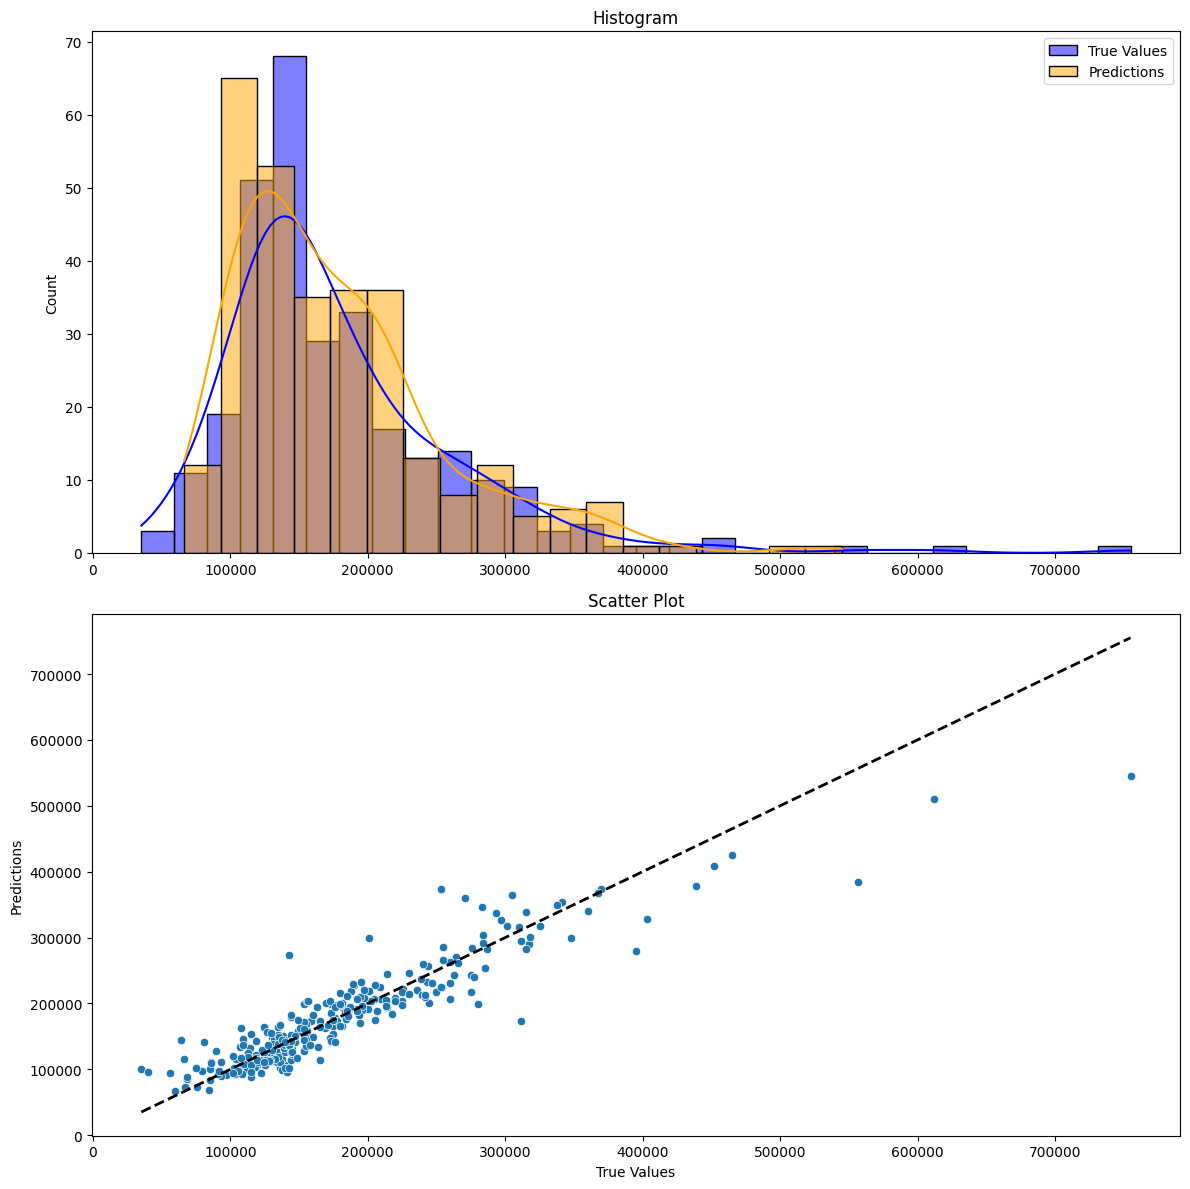

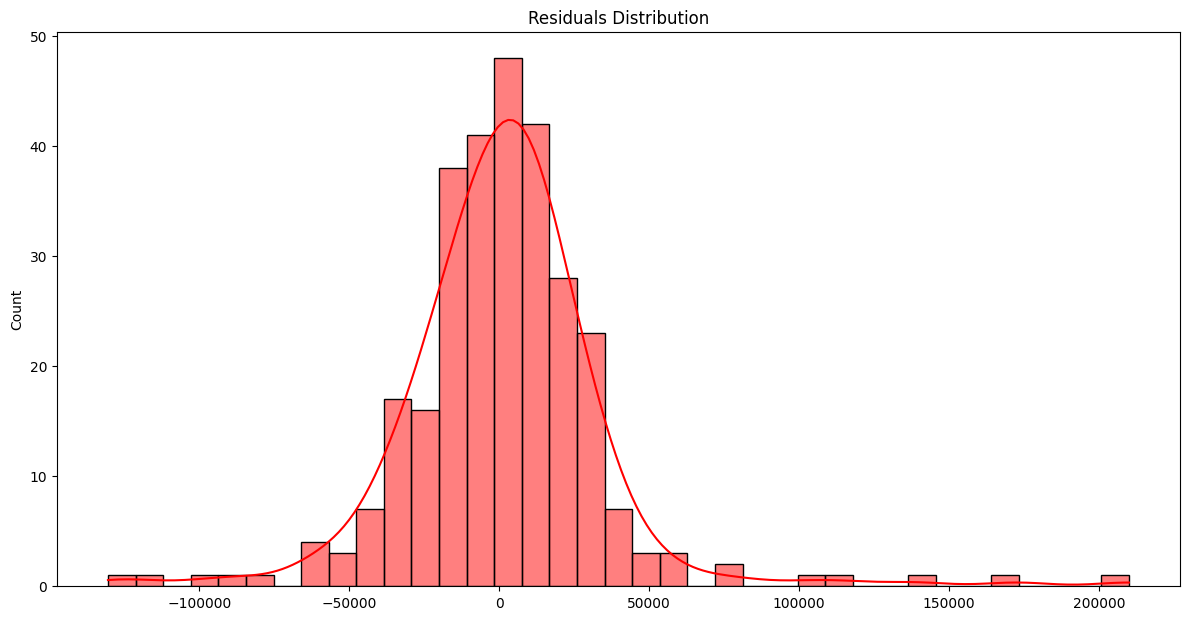

In [ ]:
analyze_predictions(true_values, predictions)

## Performance by percentiles

In [ ]:
def analyze_predictions_by_percentiles(true_values, predictions, percentiles=[5, 25, 50, 75, 95, 100]):
    true_values = true_values.ravel()
    predictions = predictions.ravel()

    # Calculate residuals
    residuals = np.abs(true_values - predictions)

    # Combine true values, predictions, and residuals into a DataFrame
    df = pd.DataFrame({
        'True Values': true_values,
        'Predictions': predictions,
        'Residuals': residuals
    })

    # Calculate and print performance metrics for the specified percentiles
    performance_by_percentile = {}
    for percentile in percentiles:
        threshold = np.percentile(df['Residuals'], percentile)
        within_threshold = df[df['Residuals'] <= threshold]
        mae = mean_absolute_error(within_threshold['True Values'], within_threshold['Predictions'])
        mse = mean_squared_error(within_threshold['True Values'], within_threshold['Predictions'])
        rmse = np.sqrt(mse)
        r2 = r2_score(within_threshold['True Values'], within_threshold['Predictions'])

        performance_by_percentile[percentile] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }

    # Print performance by percentile
    for percentile, metrics in performance_by_percentile.items():
        print(f"Performance for {percentile}th Percentile:")
        print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
        print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
        print(f"  Root Mean Squared Error (RMSE): {metrics['RMSE']}")
        print(f"  R-squared (R²): {metrics['R2']}")
        print()

    return performance_by_percentile


In [ ]:
performance_by_percentile = analyze_predictions_by_percentiles(true_values, predictions)

Performance for 5th Percentile:
  Mean Absolute Error (MAE): 910.3088541666687
  Mean Squared Error (MSE): 1191042.7376749718
  Root Mean Squared Error (RMSE): 1091.3490448408209
  R-squared (R²): 0.9997372493718794

Performance for 25th Percentile:
  Mean Absolute Error (MAE): 3768.0377782534247
  Mean Squared Error (MSE): 18559844.55341746
  Root Mean Squared Error (RMSE): 4308.113804603757
  R-squared (R²): 0.9957366450258657

Performance for 50th Percentile:
  Mean Absolute Error (MAE): 7509.426744434932
  Mean Squared Error (MSE): 75916929.54681939
  Root Mean Squared Error (RMSE): 8713.032167209036
  R-squared (R²): 0.9785511570190202

Performance for 75th Percentile:
  Mean Absolute Error (MAE): 12000.791880707762
  Mean Squared Error (MSE): 201813429.8453726
  Root Mean Squared Error (RMSE): 14206.10537217617
  R-squared (R²): 0.948079926604163

Performance for 95th Percentile:
  Mean Absolute Error (MAE): 17534.946920126353
  Mean Squared Error (MSE): 484387376.6790644
  Root 

In [ ]:
residuals = true_values - predictions

threshold = 2 * np.std(residuals)

outlier_indices = np.where(np.abs(residuals) > threshold)[0]

outliers = pd.DataFrame({
        'True Values': true_values[outlier_indices].flatten(),
        'Predictions': predictions[outlier_indices].flatten(),
        'Residuals': residuals[outlier_indices].flatten()})


outliers

,True Values,Predictions,Residuals
0,311500.00000,172865.07812,138634.92188
1,253293.00000,373759.31250,-120466.31250
2,611657.00000,510403.34375,101253.65625
3,755000.00000,545007.06250,209992.93750
4,403000.00000,328431.71875,74568.28125
5,200624.00000,300025.59375,-99401.59375
6,556581.00000,384021.68750,172559.31250
7,271000.00000,359427.56250,-88427.56250
8,280000.00000,199723.54688,80276.45312
9,64500.00000,145335.17188,-80835.17188
